# Создание обучающей выборки

In [189]:
import pandas as pd
import numpy as np
from math import pi
import random
from sklearn import preprocessing

## 1.Создание стратегий

In [190]:
C, C0, sigma1, sigma2=120,70,1,1
args=[C,C0,sigma1,sigma2]
N=40
alpha_j=0.0016
alpha_a=0.006
beta_j=0.0000007
beta_a=0.000000075
delta_j=0.000016
delta_a=0.00006
gamma_j=0.00008
gamma_a=0.004

lamb=[alpha_j,alpha_a,beta_j,beta_a,delta_j,delta_a,gamma_j,gamma_a]

def getData ():
    Aj=np.empty(N,dtype=float)
    Bj=np.empty(N,dtype=float)
    Aa=np.empty(N,dtype=float)
    Ba=np.empty(N,dtype=float)

    M1=np.empty(N,dtype=float)
    M2=np.empty(N,dtype=float)
    M3=np.empty(N,dtype=float)
    M4=np.empty(N,dtype=float)
    M5=np.empty(N,dtype=float)
    M6=np.empty(N,dtype=float)
    M7=np.empty(N,dtype=float)
    M8=np.empty(N,dtype=float)
    

    for i in range(0,N):
        Aj[i]=random.uniform(-C, 0)
        Bj[i]=random.uniform(-min(Aj[i]+C,-1*Aj[i]), min(Aj[i]+C,-1*Aj[i]))
        Aa[i]=random.uniform(-C, 0)
        Ba[i]=random.uniform(-min(Aa[i]+C,-1*Aa[i]), min(Aa[i]+C,-1*Aa[i]))

        M1[i]=(sigma1*(Aj[i]+C))
        M2[i]=-(sigma2*(Aj[i]+C+Bj[i]/2))
        M3[i]=-((2*pi)**2)*(Bj[i]**2)/2
        M4[i]=-((Aj[i]+C0)**2+(Bj[i]**2)/2)
        M5[i]=(sigma1*(Aa[i] + C))
        M6[i]=-(sigma2*(Aa[i] + C + Ba[i]/2))
        M7[i]=-((2*pi)**2)*(Ba[i]**2)/2
        M8[i]=-((Aa[i] + C0)**2 + (Ba[i]**2)/2)


    cols=['A_j','B_j','A_a','B_a','M1','M2','M3','M4','M5','M6','M7','M8']
    data = pd.DataFrame({
        cols[0]:Aj,cols[1]:Bj,
        cols[2]:Aa,cols[3]:Ba,
        cols[4]:M1,cols[5]:M2,cols[6]:M3,cols[7]:M4,
        cols[8]:M5,cols[9]:M6,cols[10]:M7,cols[11]:M8
    })
    data_ = pd.DataFrame(data =  data )
    data_.to_csv("data_parameters.csv", index=False)
    return data

ndata=getData()
ndata

,A_j,B_j,A_a,B_a,M1,M2,M3,M4,M5,M6,M7,M8
0,-43.172741,41.497011,-10.723954,4.338092,76.827259,-97.575764,-33990.955033,-1580.702777,109.276046,-111.445092,-371.473032,-3523.059179
1,-48.673763,-43.570337,-30.904311,-0.226503,71.326237,-49.541069,-37472.406371,-1403.995538,89.095689,-88.982437,-1.012691,-1528.498521
2,-112.764787,-5.137114,-112.119410,3.648770,7.235213,-4.666656,-520.916524,-1842.021971,7.880590,-9.704975,-262.798402,-1780.701441
3,-38.133339,24.346518,-12.392265,-7.812139,81.866661,-94.039920,-11700.474195,-1311.860538,107.607735,-103.701665,-1204.674400,-3349.165835
4,-33.127011,22.015184,-72.453981,38.258388,86.872989,-97.880581,-9566.969117,-1601.951498,47.546019,-66.675213,-28892.363844,-737.874148
5,-51.736170,-51.417553,-73.974864,-41.422120,68.263830,-42.555053,-52185.825043,-1655.449862,46.025136,-25.314076,-33868.376972,-873.695555
6,-63.607731,-56.311255,-27.743181,10.135145,56.392269,-28.236642,-62592.191749,-1626.339845,92.256819,-97.324392,-2027.634503,-1836.999359
7,-56.575575,19.259551,-100.216891,-10.176624,63.424425,-73.054201,-7321.870421,-365.680344,19.783109,-14.694796,-2044.265216,-964.842366
8,-82.829930,4.349626,-62.606918,12.020088,37.170070,-39.344883,-373.450962,-174.066739,57.393082,-63.403126,-2851.970566,-126.898921
9,-17.856477,14.324703,-43.205642,-23.873770,102.143523,-109.305874,-4050.428813,-2821.545531,76.794358,-64.857473,-11250.498177,-1002.916051


In [191]:
def get_strategyParam ():
    data_strategyParam=getData().drop(['A_j','B_j','A_a','B_a'], axis=1)
    scaler = preprocessing.MinMaxScaler()
    norm_data = scaler.fit_transform(data_strategyParam)
    names=data_strategyParam.columns
    # cols=['M1','M2','M3','M4','M5','M6','M7','M8']
    data_strategyParam=pd.DataFrame(norm_data,columns=names)
    return data_strategyParam

get_strategyParam ()


,M1,M2,M3,M4,M5,M6,M7,M8
0,0.084164,0.958273,0.957780,0.589994,0.350976,0.486503,0.571255,0.846537
1,0.949169,0.010359,0.990969,0.178388,0.751436,0.347643,0.853467,0.623520
2,0.988538,0.008377,0.995761,0.046945,0.931768,0.033042,0.969393,0.211200
3,0.901611,0.167882,0.864775,0.282191,0.705772,0.213565,0.880905,0.718454
4,0.878721,0.031409,0.904817,0.361949,0.096958,0.949564,0.955124,0.706093
5,0.675596,0.125354,0.387135,0.620145,0.985060,0.019423,0.999715,0.051316
6,0.181731,0.781935,0.985057,0.791152,0.618751,0.226023,0.587032,0.738336
7,0.042798,0.953175,1.000000,0.504985,0.466818,0.495869,0.976533,0.997748
8,0.948473,0.002065,0.982255,0.177630,0.051087,0.909193,0.981558,0.624559
9,0.568117,0.196624,0.111698,0.649491,1.000000,0.000000,0.998688,0.000000


In [192]:
data=get_strategyParam ()
data.loc[1]

M1    0.650114
M2    0.279975
M3    0.892918
M4    0.827003
M5    0.781197
M6    0.204401
M7    0.994357
M8    0.600067
Name: 1, dtype: float64

## 2.Разделение стратегий на классы

In [193]:
def fitness(v):
    return np.dot(v, lamb)

def get_target(v,w):
    if fitness(v)-fitness(w)>0:
        return 1
    return -1

In [194]:

def get_Sample():
    data_arr=get_strategyParam().to_numpy()
    train_data_arr = []
    for i in range(0,len(data_arr)):
        for j in range(i+1,len(data_arr)):
            v=np.empty(8,dtype=float)
            w=np.empty(8,dtype=float)
            # v=(data.iloc[i, :]).to_numpy()
            # w=(data.iloc[j, :]).to_numpy()
            v=data_arr[i,:]
            w=data_arr[j,:]
            str_=[*(v-w), get_target(v,w)]   #должен быть M1,M2,M3,M4,{-1,1}
            train_data_arr.append(str_)
    trainSample=pd.DataFrame(columns=['M1', 'M2', 'M3', 'M4','M5','M6','M7','M8', 'target'], data=train_data_arr)
    data = pd.DataFrame(data =  trainSample )
    data.to_csv("Sample.csv", index=False)
    return trainSample

get_Sample()



,M1,M2,M3,M4,M5,M6,M7,M8,target
0,-0.174790,0.354500,-0.139626,0.167642,0.879619,-0.858328,0.001376,-0.808494,-1
1,0.474701,-0.332885,-0.254555,0.326541,0.918104,-0.851371,0.076752,-0.728736,-1
2,0.471235,-0.383249,-0.239125,0.323088,0.184524,-0.187311,-0.000484,-0.529455,-1
3,-0.352809,0.480339,-0.247214,0.546884,0.151024,-0.192985,0.044060,-0.438051,1
4,0.340175,-0.150343,-0.149686,0.099511,0.599885,-0.685844,0.237729,-0.971518,-1
...,...,...,...,...,...,...,...,...,...
775,-0.368483,0.488628,-0.258497,0.806535,-0.123325,-0.075656,0.579921,0.019968,1
776,0.150490,0.047339,-0.111046,-0.148210,-0.187958,0.276474,0.457714,-0.026288,1
777,-0.618450,0.594090,-0.008956,0.993863,-0.081673,-0.127646,0.549326,0.057975,1
778,-0.099476,0.152802,0.138495,0.039118,-0.146306,0.224484,0.427119,0.011719,1


In [195]:
X=get_Sample().loc[:,'M1':'M8']
y=get_Sample().loc[:,'target']

No handles with labels found to put in legend.


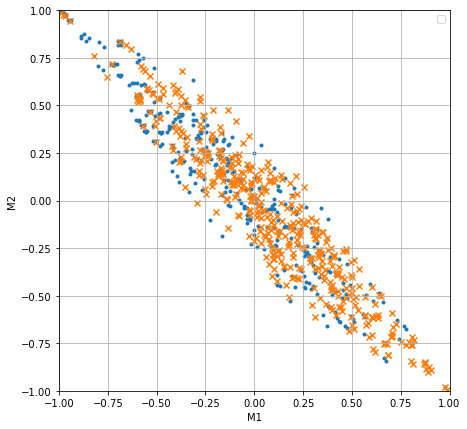

No handles with labels found to put in legend.


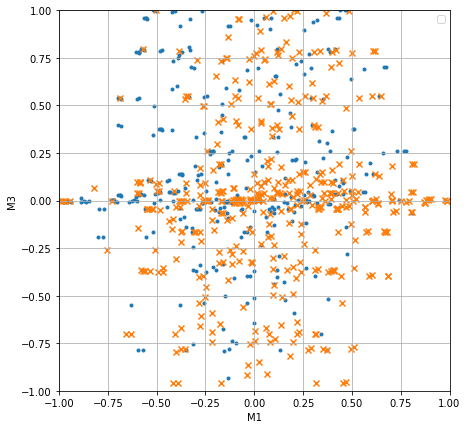

No handles with labels found to put in legend.


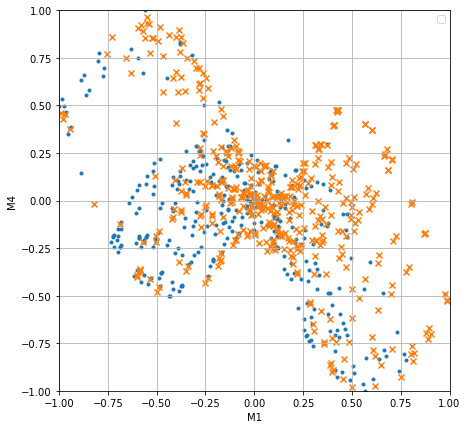

No handles with labels found to put in legend.


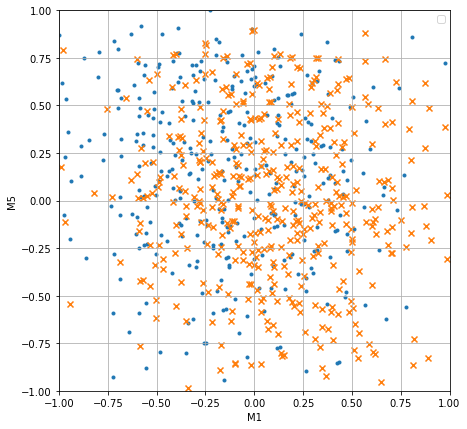

No handles with labels found to put in legend.


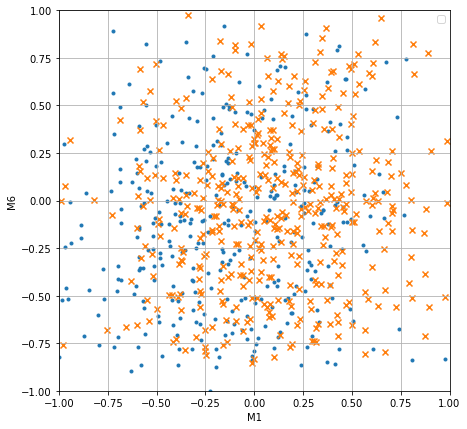

No handles with labels found to put in legend.


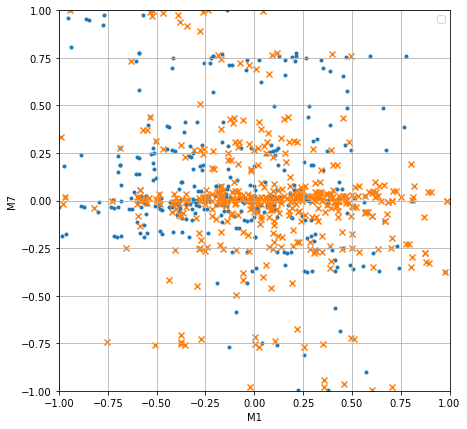

No handles with labels found to put in legend.


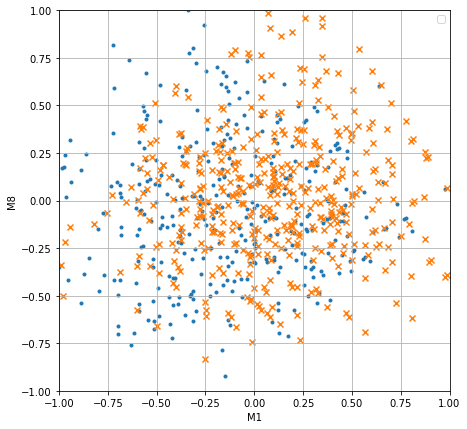

No handles with labels found to put in legend.


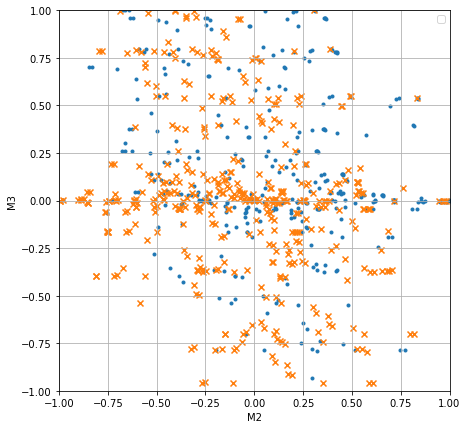

No handles with labels found to put in legend.


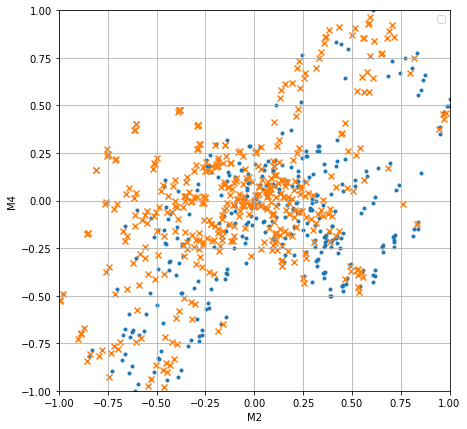

No handles with labels found to put in legend.


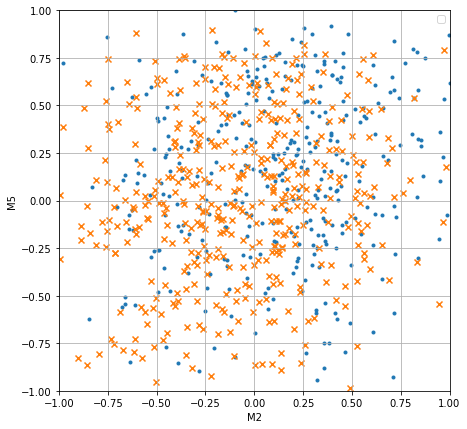

No handles with labels found to put in legend.


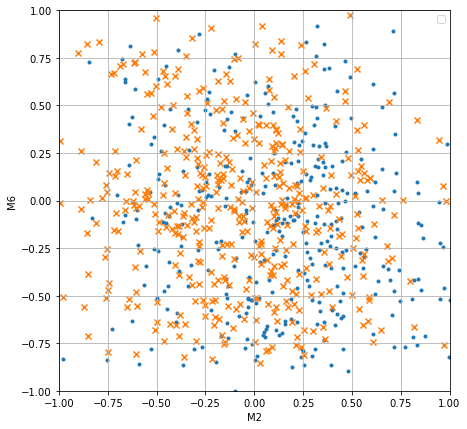

No handles with labels found to put in legend.


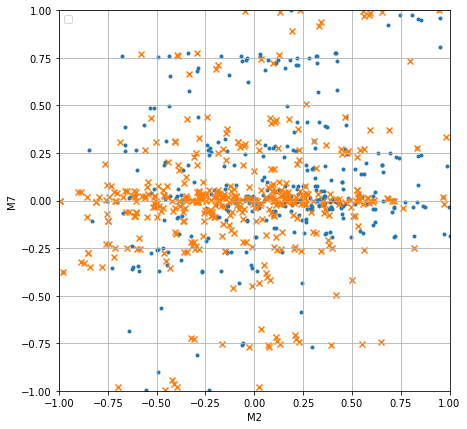

No handles with labels found to put in legend.


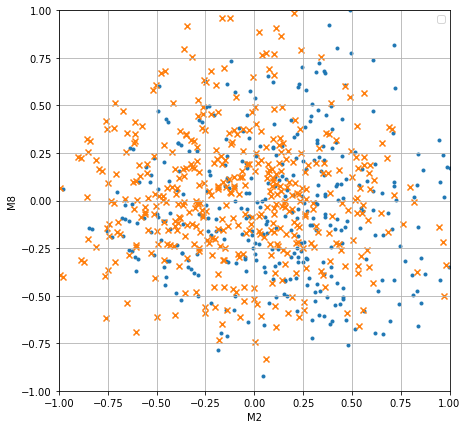

No handles with labels found to put in legend.


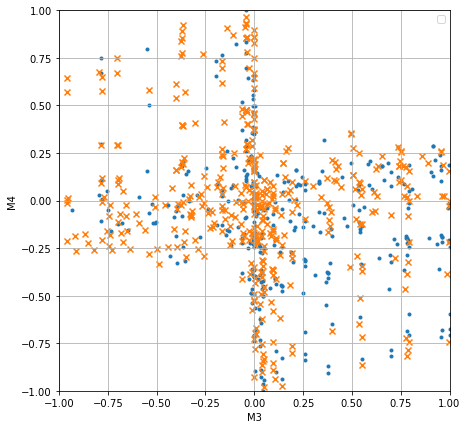

No handles with labels found to put in legend.


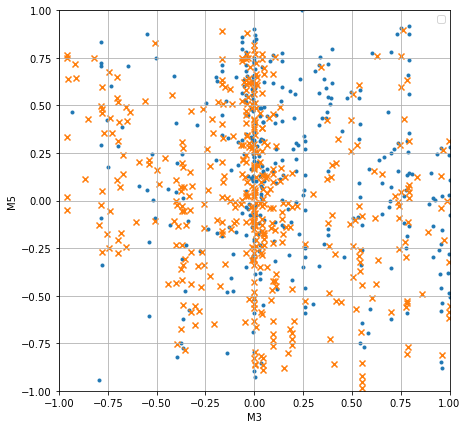

No handles with labels found to put in legend.


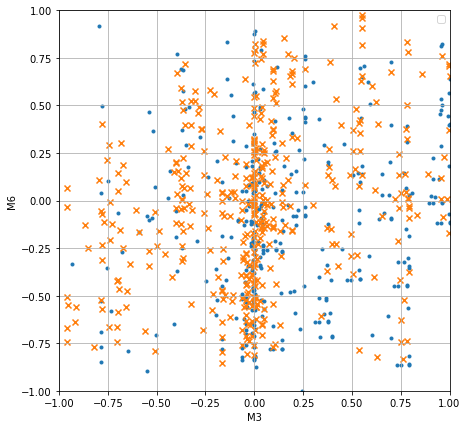

No handles with labels found to put in legend.


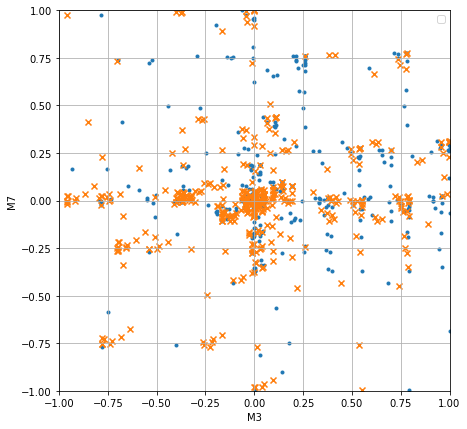

No handles with labels found to put in legend.


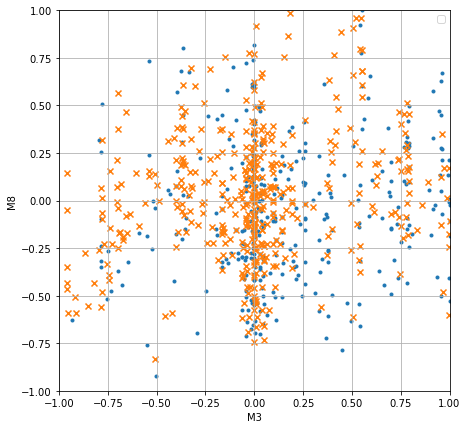

No handles with labels found to put in legend.


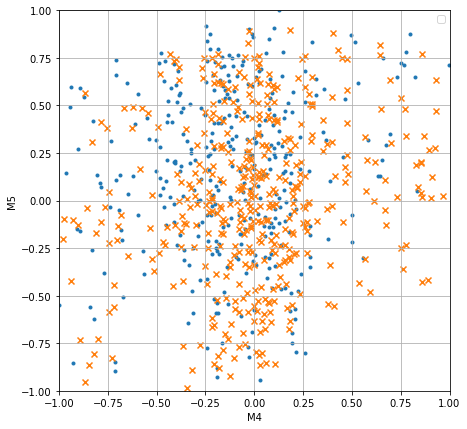

No handles with labels found to put in legend.


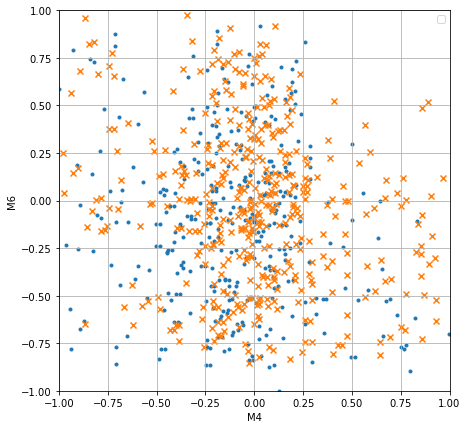

No handles with labels found to put in legend.


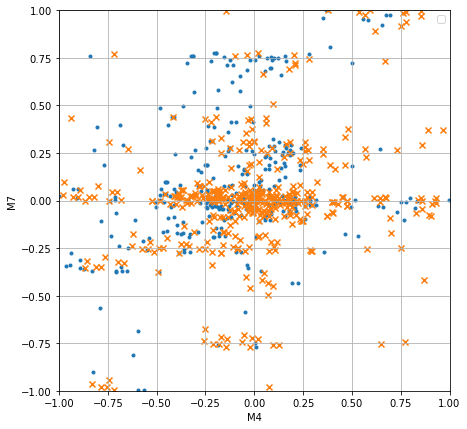

No handles with labels found to put in legend.


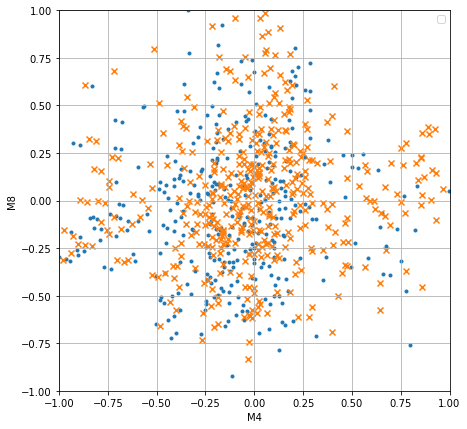

No handles with labels found to put in legend.


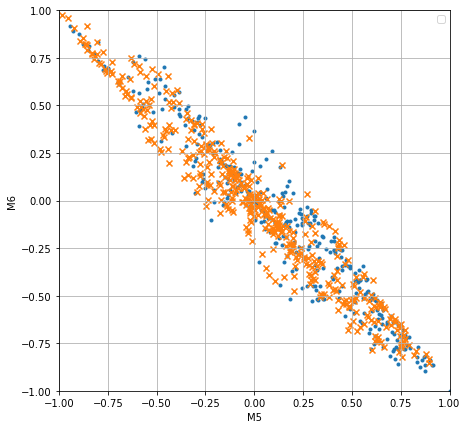

No handles with labels found to put in legend.


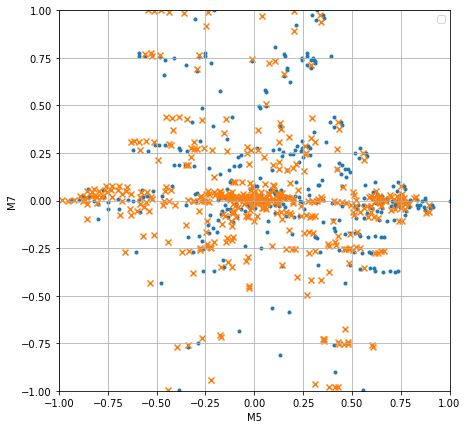

No handles with labels found to put in legend.


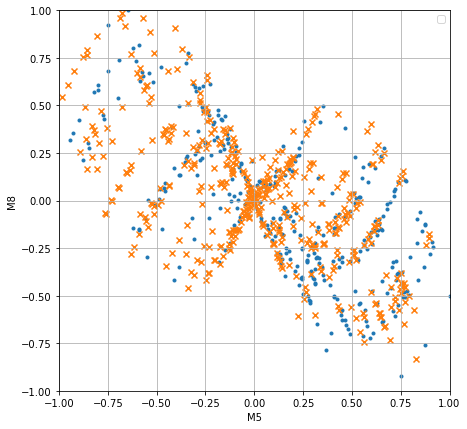

No handles with labels found to put in legend.


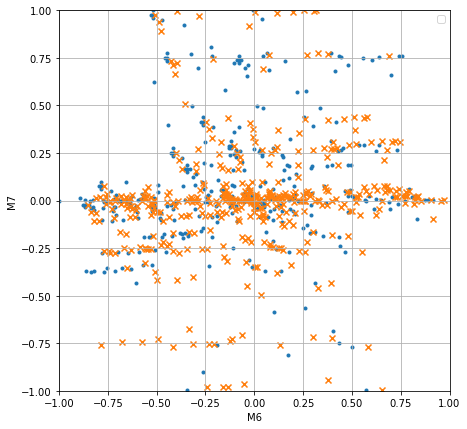

No handles with labels found to put in legend.


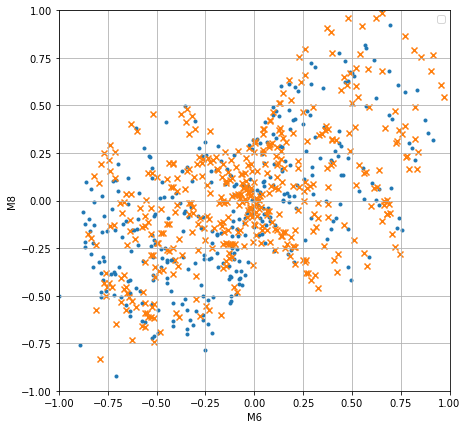

No handles with labels found to put in legend.


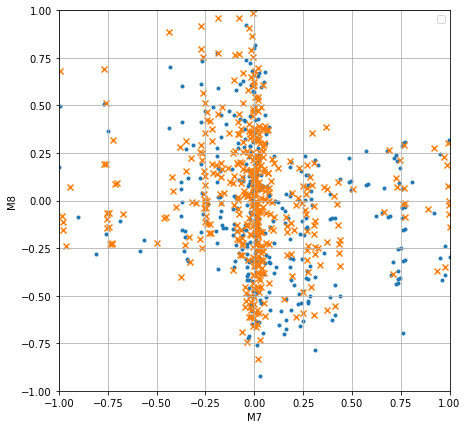

In [196]:
import matplotlib.pyplot as plt
%matplotlib inline

X1 = X[y==1]
X0 = X[y==-1]

for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        x=np.linspace(-1, 1)
        plt.figure(figsize=(7, 7))
        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.legend()
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.grid()
        plt.show()
        

## 3.Разделение выборки на тестувую и обучающую

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  
X_train, y_train


(           M1        M2        M3        M4        M5        M6        M7  \
 240 -0.234725  0.255908 -0.003742 -0.396319  0.516832 -0.382241 -0.170019   
 303  0.740084 -0.728579  0.001571 -0.894508  0.592777 -0.677078 -0.353106   
 518 -0.339892  0.489626  0.550908 -0.342514 -0.984356  0.972812  0.002955   
 272  0.363267 -0.362757 -0.001003 -0.033140  0.164770 -0.189909 -0.059503   
 118 -0.171395  0.222584 -0.063390  0.481359  0.138145 -0.004353  0.375026   
 ..        ...       ...       ...       ...       ...       ...       ...   
 763 -0.381335  0.442163 -0.095932  0.821019  0.651918 -0.615205 -0.039875   
 192  0.308177 -0.246447  0.023063 -0.571207 -0.265291  0.096457 -0.212934   
 629 -0.132167  0.473638 -0.420252  0.067601  0.556091 -0.401303  0.251261   
 559 -0.531514  0.467773  0.108535 -0.411991 -0.111890  0.252663  0.436836   
 684 -0.036000 -0.120163 -0.537908 -0.065361 -0.606228  0.467150 -0.269560   
 
            M8  
 240 -0.013893  
 303 -0.191634  
 518  0.541

In [198]:
X_test, y_test

(           M1        M2        M3        M4        M5        M6        M7  \
 699  0.457387 -0.411775  0.049760 -0.832697  0.308799 -0.053014 -0.965487   
 327  0.434892 -0.635156  0.958747 -0.715163 -0.848226  0.810265  0.019844   
 210  0.534690 -0.360488  0.539163 -0.511575 -0.368160  0.261218 -0.272940   
 14   0.354109 -0.600156  0.534714 -0.051832  0.092661 -0.051188  0.159098   
 413  0.623926 -0.604380  0.008240  0.038965 -0.174211  0.211048  0.047036   
 ..        ...       ...       ...       ...       ...       ...       ...   
 52  -0.325065  0.153798  0.700965 -0.321424  0.250230 -0.094823  0.229222   
 318  0.422520 -0.389715  0.033689 -0.926061 -0.851951  0.793600  0.059046   
 602  0.005197  0.109356 -0.684186 -0.170102 -0.172399  0.302651 -0.715549   
 494 -0.058638  0.300655 -0.559071 -0.155911  0.524148 -0.687568 -0.167803   
 352  0.684199 -0.811619 -0.398351  0.158078 -0.231827  0.204888 -0.006407   
 
            M8  
 699 -0.241119  
 327  0.278721  
 210  0.796

# Реализация метода опорных векторов

In [199]:
from sklearn.svm import SVC 
#экземпляр классификатора
svc_model = SVC(kernel = 'linear')
#обучения классификатора
svc_model.fit(X_train, y_train)
SVC_prediction = svc_model.predict(X_test) 
SVC_prediction


array([-1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1,
        1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1,
        1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,
       -1,  1, -1], dtype=int64)

In [209]:
svc_model.coef_ # Коэффициенты разделяющей гиперплоскости

array([[-1.49249547,  0.2838667 ,  0.36662733, -2.25159586,  3.0215546 ,
         1.35537294,  1.50498642,  1.16548688]])

<img src="form.png">


In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))


sns.scatterplot(x=X_train.iloc[:,0], 
                y=X_train.iloc[:,1], 
                hue=y_train, 
                s=8)

w = svc_model.coef_[0]
b = svc_model.intercept_[0]
x_points = np.linspace(-1, 1)   
y_points = -(w[0] / w[1]) * x_points - b / w[1]  
plt.plot(x_points, y_points, c='r')

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

<Figure size 720x720 with 0 Axes>

## Расчет оптимальной стратегии

In [203]:
lamb_method=svc_model.coef_[0]
#lamb=[alpha_j,alpha_a,beta_j,beta_a,delta_j,delta_a,gamma_j,gamma_a]

def calc_A_j(lamb):
    return (sigma1*lamb[0]-sigma2*lamb[6])/(2*lamb[4])-C0

def calc_B_j(lamb):
    return -sigma2*lamb[6]/(2*lamb[4]+2*(2*pi)**2*lamb[2]) 

def calc_A_a(lamb):
    return (sigma1*lamb[1]-sigma2*lamb[7])/(2*lamb[5])-C0

def calc_B_a(lamb):
    return -sigma2*lamb[7]/(2*lamb[5]+2*(2*pi)**2*lamb[3])  

A_j_method, B_j_method= calc_A_j(lamb_method),calc_B_j(lamb_method)
A_a_method, B_a_method= calc_A_a(lamb_method),calc_B_a(lamb_method)
A_j, B_j= calc_A_j(lamb),calc_B_j(lamb)
A_a, B_a= calc_A_a(lamb),calc_B_a(lamb)

print('Вычисленные стратегий A и B по коэффициентам, полученным методом опорных векторов:\n', A_j_method, B_j_method, A_a_method, B_a_method)
print('Вычисленные стратегий A и B по коэффициентам, которые были даны:\n', A_j, B_j, A_a, B_a)


Вычисленные стратегий A и B по коэффициентам, полученным методом опорных векторов:
 -70.49601650333172 -0.04301086537751676 -70.32523158801038 0.006657332966141101
Вычисленные стратегий A и B по коэффициентам, которые были даны:
 -22.499999999999993 -0.9166975755058742 -53.33333333333333 -31.765756102183143


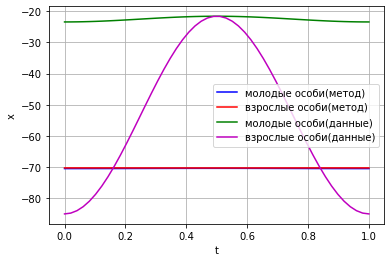

In [204]:
t=np.linspace(0,1)
x_j_method=A_j_method+B_j_method*np.cos(2*pi*t)
x_a_method=A_a_method+B_a_method*np.cos(2*pi*t)
x_j=A_j+B_j*np.cos(2*pi*t)
x_a=A_a+B_a*np.cos(2*pi*t)
plt.xlabel("t") 
plt.ylabel("x")
plt.grid()  
plt.plot(t,x_j_method,label='молодые особи(метод)',color='b')
plt.plot(t,x_a_method,label='взрослые особи(метод)',color='r')
plt.plot(t,x_j,label='молодые особи(данные)', color='g')
plt.plot(t,x_a,label='взрослые особи(данные)',color='m')
plt.legend()
plt.show()

# Реализация метода дискриминанта Фишера

## Масштабирование объектов

In [205]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Выполнение LDA

In [206]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

lda_model = LDA(n_components=1)
X_train = lda_model.fit_transform(X_train, y_train)
X_test = lda_model.transform(X_test)
LDA_prediction= lda_model.predict(X_test)
LDA_prediction

ValueError: X has 1 features per sample; expecting 8

In [ ]:
lda_model.coef_.shape

(1, 1)

IndexError: index 1 is out of bounds for axis 0 with size 1

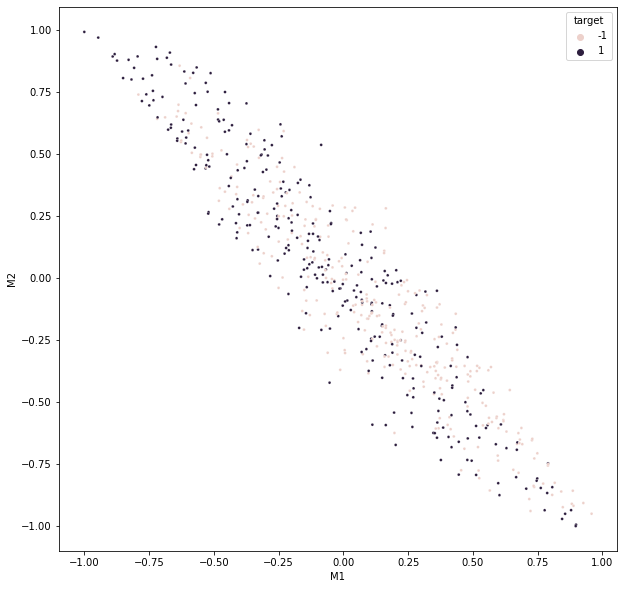

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

sns.scatterplot(x=X_train.iloc[:,0], 
                y=X_train.iloc[:,1], 
                hue=y_train, 
                s=8)
w = lda_model.coef_[0]
b = lda_model.intercept_[0]
x_points = np.linspace(-1, 1)   
y_points = -(w[0] / w[1]) * x_points - b / w[1]  
plt.plot(x_points, y_points, c='r')

## Сравнение методов 

In [ ]:
# Оценка точности — простейший вариант оценки работы классификатора
print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(LDA_prediction, y_test))

0.6858974358974359
0.6730769230769231
